In [1]:
import scipy.linalg as lin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from scipy.optimize import newton

In [2]:
%matplotlib inline
plt.style.use("seaborn")
plt.rc('figure', figsize=(10, 10))

In [3]:
DEFAULT_X = ([-10, 10], [0, 0], "darkgray") # parameters for plotting y=0 funtion
DEFAULT_Y = ([0, 0], [-100, 100], "darkgray") # parameters for plotting x=0 function

# Task 1
## Matrix
#### $\begin{pmatrix}
    -3 & 1 & 0\\
    4 & -1 & 3\\
    6 & 2 & 3\\
 \end{pmatrix}$

In [4]:
A = np.matrix([[-3, 1, 0],
              [4, -1, 3],
              [6, 2, 3]])

## Cofficients of the characteristic polynom. 
### LeVerrier-Faddeev method

In [5]:
def diag_sum(A):
    return np.sum(A.diagonal())

def leverrier_fadeev(A):
    """Return the coefficients 
    of the matrix characteristic polynomial
    using the LeVerrier-Fadeev method
    """
    p = [-1, diag_sum(A)]    
    n = len(A)
    E = np.eye(n)
    Ai = A
    for i in range(1, n):
        Bi = Ai - p[i]*E
        Ai = A @ Bi
        p.append(diag_sum(Ai) / (i+1))    
    return -np.array(p)

In [6]:
p = leverrier_fadeev(A)
print(p)

[  1.   1. -19. -33.]


## Graph

In [8]:
def char_poly(x):
    """Return the value 
    of the characteristic polynomial
    at the point x
    """
    len_p_1 = len(p) - 1
    return sum(p[i] 
                  * x**(len_p_1 - i) 
                  for i in range(len_p_1 + 1))

def char_poly_der(x):   
    """Return the value of the derivative
    of the characteristic polynomial
    at the point x
    """
    len_p_1 = len(p) - 1
    return sum(p[i] 
                  * (len_p_1-i) 
                  * x**(len_p_1-i-1)  
                  for i in range(len_p_1))

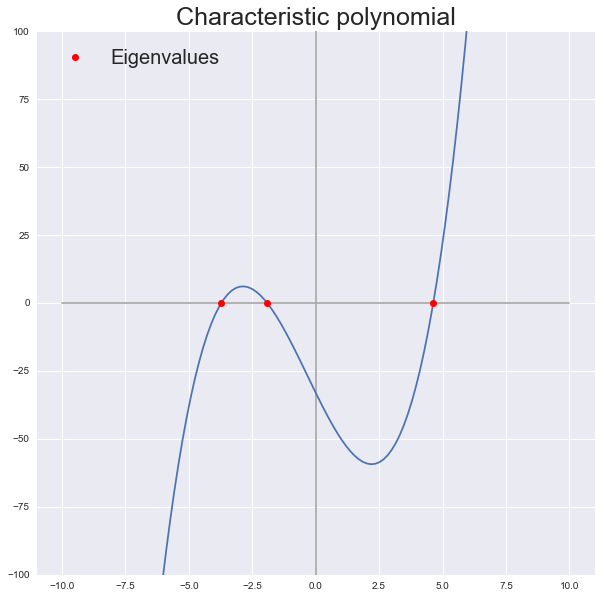

In [9]:
X = np.linspace(-8, 8, 100)
y = char_poly(X)

plt.plot(*DEFAULT_X)
plt.plot(*DEFAULT_Y)
plt.plot(X, y)

eigvals2plot1 = np.real(lin.eigvals(A))
plt.plot(eigvals2plot1, [0]*len(eigvals2plot1), 'ro', label="Eigenvalues")
    
plt.ylim(-100, 100)
plt.title("Characteristic polynomial", fontsize=25)
plt.legend(fontsize=20)

plt.show()

## Roots of the polynomial (eigenvalues of the matrix A)
### Newton method

In [10]:
x0s = [-4, -2, 5]
[newton(char_poly, x0, fprime=char_poly_der, tol=1e-3) for x0 in x0s]

[-3.7226196841833006, -1.9125093931949839, 4.6351284354349556]

## scipy.linalg.eigvals

In [11]:
lin.eigvals(A)

array([ 4.63512842+0.j, -3.72261902+0.j, -1.91250939+0.j])

# Task 2
## Matrix
#### $\begin{pmatrix}
    0.5 & 1.4 & 2 & 1\\
    1.4 & 1 & 0 & 1.5\\
    2 & 0 & 2.5 & 2\\
    1 & 1.5 & 2 & 1\\
 \end{pmatrix}$

In [12]:
A = np.matrix([[0.5, 1.4, 2, 1], 
              [1.4, 1, 0, 1.5], 
              [2, 0, 2.5, 2],
              [1, 1.5, 2, 1]])

## 2-norm

In [13]:
lin.norm(A)

5.9093146810776629

## Condition number

In [14]:
def get_cond(matrix):
    return lin.norm(matrix) * lin.norm(lin.inv(matrix))

In [15]:
get_cond(A)

24.237986225484196

## Gershgorin circles

In [16]:
def get_circles(A):
    """Return the centers and radii
    of the Gershgorin circles
    """
    circles = []
    n = len(A)
    A = np.abs(A)
    for i in range(n):
        x = A[i, i]
        radius = np.sum(A[i]) - x
        circles.append({"xy": (x, 0), 
                        "radius": radius})
    return circles

In [17]:
get_circles(A)

[{'radius': 4.4000000000000004, 'xy': (0.5, 0)},
 {'radius': 2.8999999999999999, 'xy': (1.0, 0)},
 {'radius': 4.0, 'xy': (2.5, 0)},
 {'radius': 4.5, 'xy': (1.0, 0)}]

### Graph

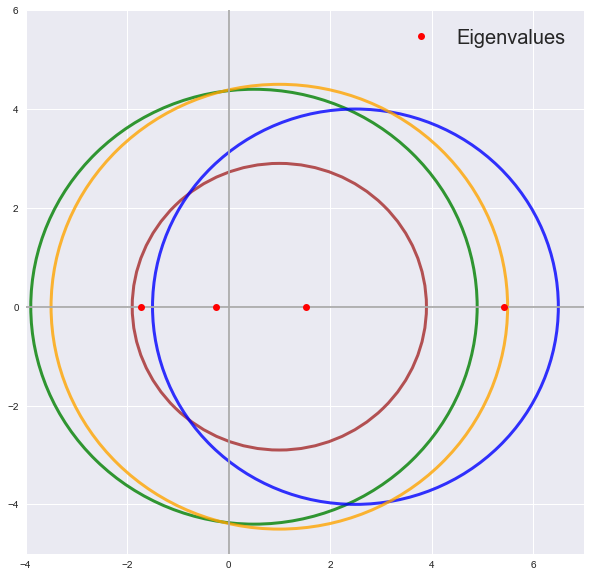

In [18]:
fig, ax = plt.subplots()
colors = np.array(['g', 'brown', 'b', 'orange'])

circles = [Circle(**v) for v in get_circles(A)]

pc = PatchCollection(circles, alpha=0.8, lw=3)
pc.set(edgecolor=colors,
      facecolor="none", 
      )
ax.add_collection(pc)
    
ax.plot(*DEFAULT_X)
ax.plot(*DEFAULT_Y)

eigvals2plot2 = np.real(lin.eigvals(A))
ax.plot(eigvals2plot2, [0] * len(eigvals2plot2), 'ro', label="Eigenvalues")
    
ax.set_xlim(-4, 7)
ax.set_ylim(-5, 6)

ax.legend(fontsize=20)
plt.show()

# Task 3

## Eigenvalues and eigenvectors of the matrix A

In [19]:
eigvals, eigvecs = lin.eig(A)
eigvals = np.real(eigvals)
for eigval, eigvect in zip(eigvals, eigvecs):
    print(f"Value: {eigval}\n\t vector: {eigvect}")

Value: 5.436363038349007
	 vector: [ 0.45883096  0.56268974  0.68030014  0.10023038]
Value: -1.7190354650740596
	 vector: [ 0.31616748 -0.5267557   0.10727961  0.78170176]
Value: -0.24980061898985062
	 vector: [ 0.65773739 -0.47041918  0.03202565 -0.58741951]
Value: 1.5324730457149083
	 vector: [ 0.50684692  0.42966787 -0.72433222  0.18394172]


## Max and min in absolute eigenvalues and eigenvectors of the matrix
### Power method

In [20]:
def power_iteration(A, inv=False, tol=1e-3, maxiter=100):
    """Return the max or the min eigenvalue 
    in absolute and the eigenvector 
    using the power method
    """
    A = np.array(A)
    n = len(A)
    x = np.ones(n)
    x_norm = np.ones(n)
    for i in range(maxiter):
        x_prev = x
        x = A @ x_norm
        x_norm = x / lin.norm(x, np.inf)
        stop = lin.norm(np.abs(x) - np.abs(x_prev))
        if stop <= tol:
            e_value = 1/np.min(x) if inv else np.max(x)
            e_vector = x_norm
            return i, e_value, e_vector  
    return maxiter, 1/np.min(x) if inv else np.max(x), x_norm

### Max in absolute eigenvalue and eigenvector

In [21]:
max_eig = power_iteration(A)
print("Number of iterations: ", max_eig[0])
print("Max eigenvalue: ", max_eig[1])
print("Eigenvector: ", max_eig[2])

Number of iterations:  7
Max eigenvalue:  5.43648871139
Eigenvector:  [ 0.69759719  0.48070556  1.          0.77060084]


#### Absolute error

In [22]:
np.abs(eigvals[0] - max_eig[1])

0.00012567303801613861

#### Relative error

In [23]:
np.abs(eigvals[0] - max_eig[1]) / eigvals[0]

2.3117116559291599e-05

### Min in absolute eigenvalue and eigenvector

In [24]:
min_eig = power_iteration(A.I, True)
print("Number of iterations: ", min_eig[0])
print("Min eigenvalue: ", min_eig[1])
print("Eigenvector: ", min_eig[2])

Number of iterations:  7
Min eigenvalue:  -0.249801762263
Eigenvector:  [ 0.93921105  0.1481111   0.04421204 -1.        ]


#### Absolute error

In [25]:
np.abs(eigvals[2] - min_eig[1])

1.1432732738847484e-06

#### Relative error

In [26]:
np.abs(eigvals[2] - min_eig[1]) / eigvals[0]

2.1030112702553326e-07

### Rayleigh quotient iteration

In [27]:
def rayleigh_quotient_iteration(A, tol=1e-3, maxiter=100):    
    """Return the max eigenvalue 
    in absolute and the eigvector 
    using the Rayleigh quotient iteration algorithm
    """
    A = np.array(A)
    n = len(A)
    x = np.ones((n, 1))
    e = np.eye(n)
    si = 0
    for i in range(maxiter):
        si = (x.T@A@x) / (x.T@x)
        xi = lin.inv(A - si*e) @ x
        x_prev = x        
        x = xi / lin.norm(xi, ord=np.inf)     
        if lin.norm(x-x_prev) < tol:
            return i, float(si), x.ravel() 
    return maxiter, float(si), x.ravel()

In [28]:
max_eigc = rayleigh_quotient_iteration(A)
print("Number of iterations: ", max_eigc[0])
print("Max eigenvalue: ", max_eigc[1])
print("Eigenvector: ", max_eigc[2])

Number of iterations:  2
Max eigenvalue:  5.436363038281806
Eigenvector:  [ 0.6975899   0.48068954  1.          0.77059162]


#### Absolute error

In [29]:
np.abs(eigvals[0] - max_eigc[1])

6.7200467412931175e-11

#### Relative error

In [30]:
np.abs(eigvals[0] - max_eigc[1]) / eigvals[0]

1.2361291352120514e-11

# Task 4

## LR algorithm

In [31]:
def get_matrix(n):
    return np.matrix(np.zeros((n, n)))

def lu_decomposition(a):
    """Return LU-decomposition of the matrix 
    witout a permutation matrix
    """
    n = len(A)
    l = get_matrix(n)
    u = get_matrix(n)

    for i in range(n):
        l[i, 0] = a[i, 0]
        u[0, i] = a[0, i] / a[0, 0]    

    for i in range(1, n):
        for j in range(1, i + 1):   
            l[i, j] = a[i, j] \
                      - np.sum([l[i, k] * u[k, j] for k in range(j)])
        for j in range(i, n):
            u[i, j] = (a[i, j] \
                       - np.sum([l[i, k] * u[k, j] for k in range(i)])) \
                       / l[i, i]   
            
    return l, u

def lr(A, tol=1e-3, maxiter=100):
    """Returns the eigenvalues of the matrix, 
    located on the main diagonal of the matrix L, 
    using the LR algorithm
    """
    A = np.array(A)
    x_prev = np.zeros(len(A))
    for i in range(maxiter):
        L, R = lu_decomposition(A)
        A = R @ L
        x = L.diagonal()
        if lin.norm(x_prev-x) < tol:
            return i, L, R
        x_prev = x
    return maxiter, L, R

In [32]:
iternumber, l, r = lr(A)
print("Number of iterations: ", iternumber)
print("L: \n", l)
print("R: \n", np.around(r))

Number of iterations:  76
L: 
 [[ 5.43636304  0.          0.          0.        ]
 [ 4.40226583 -1.71871658  0.          0.        ]
 [ 2.04421403 -1.34228923  1.53275737  0.        ]
 [ 1.          0.81092818 -0.56609963 -0.24980062]]
R: 
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  1. -0.]
 [ 0.  0.  0.  1.]]


## QR algorithm

In [33]:
def qr(A, tol=1e-3, maxiter=100):
    """Return the eigenvalues of the matrix, 
    located on the main diagonal of the matrix R, 
    using the QR algorithm
    """    
    A = np.array(A)
    x_prev = np.zeros(len(A))
    for i in range(maxiter):
        Q, R = lin.qr(A)
        A = R @ Q
        x = R.diagonal()
        if lin.norm(x_prev-x) < tol:
            return i, Q, R
        x_prev = x
    return maxiter, Q, R

In [34]:
iternumber, q, r = qr(A)
print("Number of iterations: ", iternumber)
print("Q: \n", np.around(q))
print("R: \n", np.around(r, 6))

Number of iterations:  16
Q: 
 [[-1.  0. -0. -0.]
 [-0. -1.  0.  0.]
 [-0. -0. -1.  0.]
 [-0.  0.  0.  1.]]
R: 
 [[-5.436363 -0.       -0.        0.      ]
 [ 0.        1.716362  0.043161 -0.      ]
 [ 0.        0.       -1.53486   0.      ]
 [ 0.        0.        0.       -0.249801]]


## Jacobi algorithm

In [35]:
def get_max_not_diagonal(A):
    """Return the indices 
    of the maximum matrix element in absolute
    that is not on the main diagonal
    """
    a = np.abs(np.array(A))
    np.fill_diagonal(a, 0.)
    return np.unravel_index(np.argmax(a), a.shape)

def get_H(A):
    """Return the rotation matrix H 
    for the Jacobi algorithm
    """
    A = np.array(A)
    
    i, j = get_max_not_diagonal(A)
    phi = 1 / 2 * np.arctan(2 * A[i, j] / (A[i, i]-A[j, j]))
    sin_phi = np.sin(phi)
    cos_phi = np.cos(phi)

    H = np.eye(len(A))
    H[i, i] = cos_phi
    H[i, j] = -sin_phi
    H[j, i] = sin_phi
    H[j, j] = cos_phi
    
    return H

def jacobi(A, tol=1e-3, maxiter=100):    
    """Return the eigenvalues of the matrix, 
    located on the main diagonal of the matrix A, 
    and the eigenvectors, located on the matrix V,
    using the Jacobi algorithm
    """ 
    A = np.array(A)    
    V = np.eye(len(A))
    for i in range(maxiter):
        H = get_H(A)
        V = V @ H
        A = H.T @ A @ H
        if lin.norm(np.triu(A, 1)) < tol:
            return i, A, V
    return maxiter, A, V

In [36]:
iternumber, At, V = jacobi(A)
print("Number of iterations: ", iternumber)
print("A: \n", At) 
print("V: \n", V)

Number of iterations:  13
A: 
 [[ -1.71903546e+00   1.11803340e-04   2.46826165e-07  -1.28803218e-16]
 [  1.11803340e-04   1.53247304e+00   3.25260652e-19   2.35972119e-07]
 [  2.46826165e-07  -1.62196645e-16   5.43636304e+00  -1.24951770e-04]
 [  2.16840434e-19   2.35972119e-07  -1.24951770e-04  -2.49800616e-01]]
V: 
 [[ 0.5626932   0.10021112  0.45881599 -0.68031021]
 [-0.52672881  0.78171988  0.31616514 -0.10728645]
 [-0.47043936 -0.58740333  0.6577367  -0.03204018]
 [ 0.42967422  0.18392685  0.50686283  0.7243211 ]]
